# Passos previs

## Importar paquets

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')
## modificar tamany figura
from matplotlib.pyplot import figure

import os

import pickle
from itertools import chain

## object a numerica
import category_encoders as ce

## feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Decision tree
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

## Random forest
from sklearn.ensemble import RandomForestRegressor

## XGB
from xgboost import XGBRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

## Ruta arxiu

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df = pd.read_csv(mainpath + "dfFE.csv", sep = ",")
dates = pd.read_csv(mainpath + "dates.csv", sep = ";")

In [3]:
df.duplicated().sum()
df.shape

0

(47630, 115)

In [4]:
df.head()

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,MAR_MENUDA,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87
1,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87
2,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,AD,DESCONOCIDO,DESCONOCIDO,ES,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87
3,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87
4,BAHIA_TOSSA,2018-03-28,Huespedes,PREM,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.45

In [5]:
preus = df.describe(include='float').columns.tolist()
habs = df.describe(include='int64').columns.tolist()


## Funcions

In [6]:
def correlation_df(df,target,numeric_features,threshold):
    """
    Show the correlation of the df 

 

    Inputs:
    df -- dataframe

 

    Outputs: Charts
    
    Information printed in screen
    """  
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(corrmat, vmax=.8, square=True)
    
    sns.set(font_scale=0.7)
    plt.figure(figsize=(15, 15))

 

    sns.heatmap(corrmat, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
    plt.title('Correlation between features');


def multicorrelation_df(df,target,numeric_features,threshold):
    """
    Show the correlation of the df 

 

    Inputs:
    df -- dataframe

 

    Outputs: Charts
    
    Information printed in screen
    """  

 

    # Plotting correlations
    corrmat = df.corr()

 

    
    important_corrs = (corrmat[abs(corrmat) > threshold][corrmat != 1.0]) \
        .unstack().dropna().to_dict()
        
    unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

 

    # sorted by absolute value
    unique_important_corrs = unique_important_corrs.loc[abs(unique_important_corrs['Correlation']).argsort()[::-1]]
    
    return unique_important_corrs  


# Feature Engineering

## Feature construction

### Variable temps i temperatura

Pas necessari per ajuntar amb les dades del temps

In [7]:
df.idhotel = df.idhotel.replace('MAR_MENUDA', 'MME')
df.idhotel = df.idhotel.replace('DONAIRE_BEACH', 'DON')
df.idhotel = df.idhotel.replace('COSTA_SALOU', 'SAL')
df.idhotel = df.idhotel.replace('BAHIA_TOSSA', 'TOS')
df.idhotel = df.idhotel.replace('TAURUS_AQUAPARK', 'TAU')
df.idhotel = df.idhotel.replace('PORT_SALOU', 'PAV')
df.idhotel = df.idhotel.replace('AV_SUITES', 'AVS')

In [8]:
dfw = pd.DataFrame(columns = ['date_int', 'date', 'weather', 'rain', 'rain_total', 'hotel'])

for year in ['2018', '2019']:
    directory = os.path.join(mainpath,"csv/%s/"%(year))
    os.chdir(directory)
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
               f=open(file, 'r')
               dfw = dfw.append(pd.read_csv(f)) 
               f.close()


C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
dfw = dfw.rename(columns = {'date':'fechaocupacion', 'hotel':'idhotel'})

In [10]:
df = pd.merge(df, dfw[['fechaocupacion', 'idhotel', 'weather', 'temp']])

In [11]:
df.weather.unique()
df.temp.unique()

array([1, 3, 2, 4], dtype=object)

array([16., 19., 14., 15., 13., 18., 17., 12., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 11., 10.])

S'afegeixen les variables *weather* i *temp*.

weather: variable categòrica ordinal que pren valors de l'1 al 4, de bon temps a mal temps.

temp: variable numèrica que representa la temperatura en graus centígrads.


#### Anàlisi descriptiu

Text(0.5, 1.0, 'Temps meteorològic')

Text(0, 0.5, 'Recompte')

Text(0.5, 0, 'Temps')

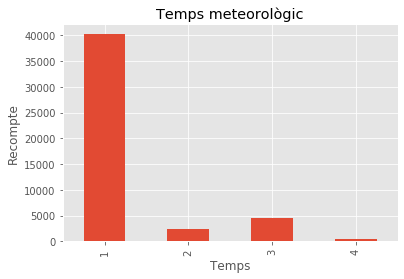

In [12]:
plt.title("Temps meteorològic")
plt.ylabel("Recompte")
plt.xlabel("Temps")
plt.show(df.weather.value_counts().sort_index().plot.bar())

Text(0.5, 1.0, 'Distribució temperatura')

Text(0.5, 0, 'Temperatura')

Text(0, 0.5, 'Densitat')

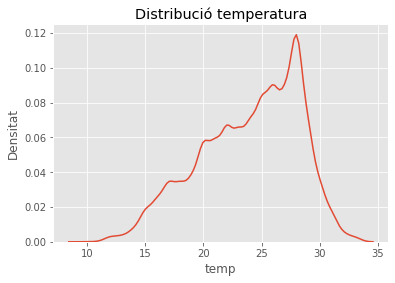

In [13]:
plt.title("Distribució temperatura")
plt.xlabel("Temperatura")
plt.ylabel("Densitat")
plt.show(sns.distplot(df.temp, hist = False))

### Variable mes, dia de la setmana, caps de setmana i temporada

In [14]:
dates = dates.rename(columns = {'date':'fechaocupacion'})

In [15]:
df = pd.merge(df,dates[['fechaocupacion', 'mes', 'diaSemana', 'findes', 'temporada']])

S'afegeixen les variables *mes*, *diaSemana*, *findes* i *temporada*.

mes: variable categòrica ordinal que pren valors l'1 al 12, depenent del mes de l'any.

diaSemana: variable categòrica ordinal que pren valors de l'1 al 7, depenent del dia de la setmana.

findes: variable categòrica ordinal. Diferencia entre dies entre setmana, divendres i caps de setmana.

temporada: variable categòrica nominal. Diferencia entre temporada alta o baixa.


#### Anàlisi descriptiu

Text(0.5, 1.0, 'Mesos')

Text(0, 0.5, 'Recompte')

Text(0.5, 0, 'Mesos')

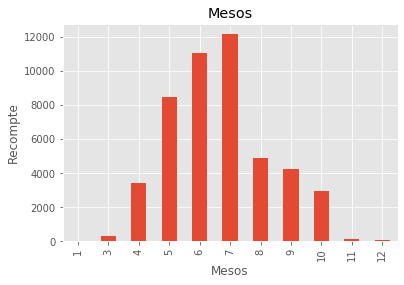

,%,Recompte
7,25.532228,12161
6,23.222759,11061
5,17.730422,8445
8,10.191056,4854
9,8.855763,4218
4,7.195045,3427
10,6.126391,2918
3,0.646651,308
11,0.281335,134
12,0.176359,84


In [16]:
plt.title("Mesos")
plt.ylabel("Recompte")
plt.xlabel("Mesos")
plt.show(df.mes.value_counts().sort_index().plot.bar())

m = pd.concat([df['mes'].value_counts().sort_index()/len(df)*100, 
                df['mes'].value_counts().sort_index()], axis = 1)
m.columns = ['%', 'Recompte']
m.sort_values(by=['Recompte'], ascending = False)

Text(0.5, 1.0, 'Dia de la setmana')

Text(0, 0.5, 'Recompte')

Text(0.5, 0, 'Dia')

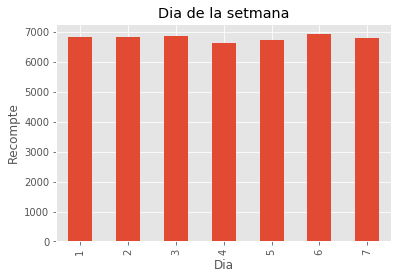

In [17]:
plt.title("Dia de la setmana")
plt.ylabel("Recompte")
plt.xlabel("Dia")
plt.show(df.diaSemana.value_counts().sort_index().plot.bar())

Text(0.5, 1.0, 'Caps de setmana')

Text(0, 0.5, 'Recompte')

Text(0.5, 0, 'Dia')

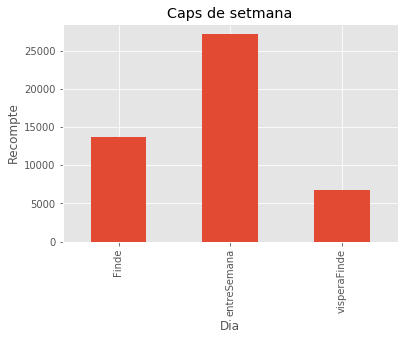

In [18]:
plt.title("Caps de setmana")
plt.ylabel("Recompte")
plt.xlabel("Dia")
plt.show(df.findes.value_counts().sort_index().plot.bar())

Text(0.5, 1.0, 'Temporada')

Text(0, 0.5, 'Recompte')

Text(0.5, 0, 'Temporada')

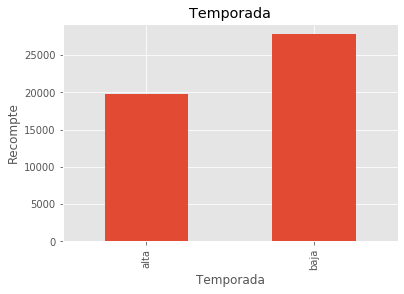

In [19]:
plt.title("Temporada")
plt.ylabel("Recompte")
plt.xlabel("Temporada")
plt.show(df.temporada.value_counts().sort_index().plot.bar())

### Variable festius

In [20]:
countries = ['ch', 'at', 'lt', 'se', 'ie', 'ua',
             'is', 'ru', 'be', 'es', 'pt', 'cz',
             'ro', 'pl', 'fr', 'it', 'nl', 'gb', 'de']

dfHolidays = pd.DataFrame(columns = ['date', 'holiday', 'country'])

for year in ['2018', '2019']:
    for country in countries:
        with open(mainpath + "holidays/bank_days_1_%s_%s.p" % (year, country) , "rb") as file:
            d = pickle.load(file)
            for key in list(d.keys()):
                if d[key]['type'][0]=='National holiday':
                    dfAux = pd.DataFrame.from_dict({'date': d[key]['date'], 'holiday':[d[key]['type'][0]], 'country':'%s'%(country)})
                    dfHolidays = dfHolidays.append(dfAux)

In [21]:
dfHolidays.country = dfHolidays.country.replace(['ch', 'at', 'de', 'nl', 'it', 'pl', 'be', 'cz'], 'CE')
dfHolidays.country = dfHolidays.country.replace(['ro', 'ru', 'lt', 'ua'], 'EE')
dfHolidays.country = dfHolidays.country.replace(['se'], 'ESC')
dfHolidays.country = dfHolidays.country.replace(['pt', 'fr'], 'OE')
dfHolidays.country = dfHolidays.country.replace(['gb', 'ie'], 'GB')
dfHolidays.country = dfHolidays.country.replace(['es'], 'ES')
dfHolidays.country = dfHolidays.country.replace(['is'], 'IS')

Es categoritza la variable país per a que encaixi amb el dataframe original.

In [22]:
dfHolidays = dfHolidays.drop_duplicates()

S'eliminen els duplicats que s'han creat a l'ajuntar els països en grups més reduïts.

In [23]:
dfHolidays = dfHolidays.rename(columns = {'date': 'fechaocupacion', 'country': 'idpais_cliente'})
df = df.merge(dfHolidays, how='left')

S'afegeix la variable *holiday*.

holiday: variable categòrica nominal, 'National holiday' si és festiu en el país d'origen del client, i 0 si no ho és.

In [24]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
sum(df.duplicated())
df.shape

holiday    46078
dtype: int64

0

(47630, 122)

In [25]:
df = df.fillna('No festiu')


#### Anàlisi descriptiu

Text(0.5, 1.0, 'Festius')

Text(0, 0.5, 'Recompte')

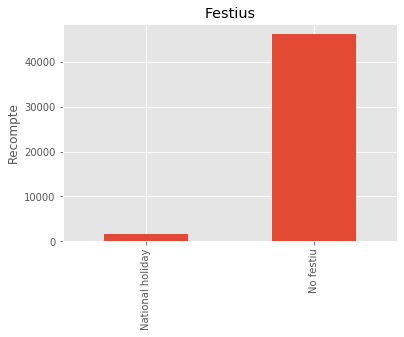

In [26]:
plt.title("Festius")
plt.ylabel("Recompte")
plt.show(df.holiday.value_counts().sort_index().plot.bar())

Gairebé sempre fa bon temps. Les temperatures solen ser a partir de 15 graus fins als 32 aproximadament. I els mesos que aporten més informació són els mesos d’estiu, juny, juliol, agost i setembre, mentre que no hi ha cap dada per al febrer. 

La distribució segons el dia de la setmana és gairebé idèntic per a tots els dies, que hi ha més observacions en temporada baixa i que la gran majoria d’observacions són de dies no festius.


### Transformació a variables numèriques

Per a poder realitzar la selecció de variables, cal que totes les variables estiguin en format numèric, per a que així les tècniques que s'emprin puguin donar informació de quines són les variables més rellevants respecte totes les variables, i no només sobre les numèriques.

Transformació de variables categòriques ordinals a numèriques amb Ordinal encoder.

In [28]:
encoder = ce.OrdinalEncoder(cols=['findes'])
df.findes = encoder.fit_transform(df['findes'], df['NHab'])

In [29]:
df.shape

(47630, 122)

Es treu la variable *fechaocupacion* ja que donaria problemes a l'hora de fer la selecció de variables. Es guarda en un objecte ja que interessarà tornar-la a ajuntar per a més endavant.

In [30]:
df_fecha = df['fechaocupacion']
df = df.drop('fechaocupacion', axis = 1)

Transformació de les variables categòriques restants (nominals) a variables dummies.

In [31]:
df = pd.get_dummies(df, prefix_sep = '_', drop_first=True)

In [32]:
df.head()

,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño,weather,temp,mes,diaSemana,findes,idhotel_DON,idhotel_MME,idhotel_PAV,idhotel_SAL,idhotel_TAU,idhotel_TOS,idcliente_OL_MEDITERRANEO,idcliente_Otros,idcliente_TUI_UK_LTD,idtipohab_FAM,idtipohab_IND,idtipohab_PREM,idtipohab_SUI,idregimen_MP,idregimen_PC,idregimen_SHAB,idregimen_TI,idsegmento_VACAC,id_canal_DIRECTO,id_canal_GRUPOS,id_canal_ONLINE,id_canal_TTOO,idpais_cliente_EAU,idpais_cliente_EE,idpais_cliente_ES,idpais_cliente_ESC,idpais_cliente_GB,idpais_cliente_IS,idpais_cliente_OE,temporada_baja,holiday_No festiu
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87,1,16.0,3,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87,1,16.0,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Feature selection

### Multicol·linealitat

#### Correlacions

In [33]:
corrMatrix = df[habs].corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(3)

In [36]:
corrMatrixF = df[preus].corr()
corrMatrixF.style.background_gradient(cmap='coolwarm').set_precision(3)

S'analitzen les correlacions entre les variables, amb la intenció d'eliminar aquelles variables que es correlacionin en excés, ja que aportarien informació redundant al model. 

In [37]:
c = multicorrelation_df(df, df['NHab'], df, 0.98)


In [38]:
pairs = c['Attribute Pair']
corrVars = []
for i in pairs.index.tolist():
    corrVars.append(pairs.loc[i][1])


Es veuen correlacions molt fortes entre la gran majoria de les que fan referència al preu en les setmanes anteriors i al nombre d'habitacions previstes a reservar en les setmanes anteriors. Es decideix anar eliminant les variables corresponents a les setmanes més llunyanes.

In [39]:
set(corrVars)

{'S1',
 'S11',
 'S11H',
 'S12',
 'S12H',
 'S13',
 'S13H',
 'S14',
 'S14H',
 'S15',
 'S15H',
 'S16',
 'S16H',
 'S17',
 'S17H',
 'S18',
 'S18H',
 'S19',
 'S19H',
 'S1H',
 'S2',
 'S20',
 'S20H',
 'S21',
 'S21H',
 'S22',
 'S22H',
 'S23',
 'S23H',
 'S24',
 'S24H',
 'S25',
 'S25H',
 'S26',
 'S26H',
 'S27',
 'S27H',
 'S28',
 'S28H',
 'S29',
 'S29H',
 'S3',
 'S30',
 'S30H',
 'S31',
 'S31H',
 'S32',
 'S32H',
 'S33',
 'S33H',
 'S34',
 'S34H',
 'S35',
 'S35H',
 'S36',
 'S36H',
 'S37',
 'S37H',
 'S38',
 'S38H',
 'S39',
 'S39H',
 'S4',
 'S40',
 'S40H',
 'S41',
 'S41H',
 'S42',
 'S42H',
 'S43',
 'S43H',
 'S44',
 'S44H',
 'S45',
 'S45H',
 'S46',
 'S46H',
 'S47',
 'S47H',
 'S48',
 'S48H',
 'S49',
 'S49H',
 'S4H',
 'S5',
 'S50',
 'S50H',
 'S51',
 'S51H',
 'S52',
 'S5H',
 'S6',
 'S6H',
 'S7',
 'S7H',
 'S8',
 'S8H',
 'S9',
 'S9H'}

Les úniques variables referents a les setmanes anteriors que tenen una correlació amb d'altres inferior a 0.98 són *S2H*, *S3H* i *S52H*.

In [40]:
df1 = df.drop(['S52', 'S51', 'S50', 'S49', 'S48', 'S47', 'S46', 'S45', 'S44', 'S43', 'S42', 'S41', 'S40',
               'S39', 'S38', 'S37', 'S36', 'S35', 'S34', 'S33', 'S32', 'S31', 'S30', 'S29', 'S28', 'S27',
               'S26', 'S25', 'S24', 'S23', 'S22', 'S21', 'S20', 'S19', 'S18', 'S17', 'S16', 'S15', 'S14',
               'S13', 'S12', 'S11', 'S10', 'S9', 'S8', 'S7', 'S6', 'S5', 'S4', 'S3', 'S2', 'S1',
               'S1H', 'S4H', 'S5H', 'S6H', 'S7H', 'S8H', 
               'S9H', 'S10H', 'S11H', 'S12H', 'S13H', 'S14H', 'S15H', 'S16H', 'S17H', 'S18H', 'S19H', 
               'S20H', 'S21H', 'S22H', 'S23H', 'S24H', 'S25H', 'S26H', 'S27H', 'S28H', 'S29H', 'S30H', 
               'S31H', 'S32H', 'S33H', 'S34H', 'S35H', 'S36H', 'S37H', 'S38H', 'S39H', 'S40H', 'S41H', 
               'S42H', 'S43H', 'S44H', 'S45H', 'S46H', 'S47H', 'S48H', 'S49H','S50H', 'S51H'], axis = 1)
multicorrelation_df(df1, df['NHab'], df, 0.10).head(50)

,Attribute Pair,Correlation
133,"(diaAño, mes)",0.979094
56,"(S2H, S3H)",0.959357
121,"(NHab, S2H)",0.939742
134,"(NHab, S3H)",0.889216
54,"(idcliente_TUI_UK_LTD, idpais_cliente_GB)",0.810199
136,"(diaSemana, findes)",0.688598
14,"(temp, temporada_baja)",-0.642853
49,"(S3H, S52H)",0.632071
21,"(idcliente_OL_MEDITERRANEO, idsegmento_VACAC)",0.614530
11,"(idpais_cliente_ES, idpais_cliente_GB)",-0.600409


In [59]:
corrMatrix = df1[df1.columns.tolist()].corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(3)

In [42]:
features_df = df1.drop(['NHab'], axis = 1)
target = df1.NHab

### Select K bests

In [78]:
#### Create and fit selector
selector = SelectKBest(f_regression, k=features_df.shape[1])
selector.fit(features_df, target)
# Get columns to keep
cols = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols]

pval = pd.DataFrame(selector.pvalues_, columns=['pvalue'])
col = pd.DataFrame({'Feature':features_df_new.columns.tolist()})
kBestPval = pd.concat([col, pval], axis = 1)
kBestPval[kBestPval['pvalue'] > 0.05]

SelectKBest(k=41, score_func=<function f_regression at 0x000001F15902CD08>)

,Feature,pvalue
8,diaSemana,0.588209
9,findes,0.301843
12,idhotel_PAV,0.117128
15,idhotel_TOS,0.370770
25,idregimen_SHAB,0.124604
38,idpais_cliente_OE,0.508091


Les variables amb un p-valor no significatiu no vol dir que no tinguin una relació amb la variable resposta. Sinó que si tenen una relació, aquesta no serà lineal. Per veure si s'eliminen es mira la importància que tenen en el *feature importance*

### Regressió lineal

In [47]:
LR = LinearRegression().fit(features_df, target)
r_sq = LR.score(features_df, target)
coefficientsLR = pd.concat([pd.DataFrame(features_df.columns),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)
coefficientsLR.columns = ['Features', 'Coefficients']
coefficientsLR.sort_values(by = ['Coefficients'], ascending = False)

,Features,Coefficients
29,id_canal_GRUPOS,3.468555
38,idpais_cliente_OE,1.818807
0,S2H,1.097942
34,idpais_cliente_ES,0.940897
31,id_canal_TTOO,0.703425
18,idcliente_TUI_UK_LTD,0.516531
15,idhotel_TOS,0.461299
27,idsegmento_VACAC,0.173729
24,idregimen_PC,0.143097
10,idhotel_DON,0.125421


In [68]:
coefficientsLR[coefficientsLR['Coefficients']<0.03].sort_values(by = ['Coefficients'], ascending = False)

,Features,Coefficients
4,diaAño,0.008465
8,diaSemana,-0.000123
3,PreuHab,-0.001139
37,idpais_cliente_IS,-0.001219
2,S52H,-0.040141
32,idpais_cliente_EAU,-0.088608
6,temp,-0.101014
12,idhotel_PAV,-0.109397
23,idregimen_MP,-0.118579
1,S3H,-0.124104


### Feature importance (Arbre de decisió)

In [48]:
# fit an Extra Trees model to the data
DT = DecisionTreeRegressor()
DT.fit(features_df, target)
# display the relative importance of each attribute
# print(model.feature_importances_)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
featImp = pd.DataFrame({'Features': features_df.columns.tolist(), 'Importance': DT.feature_importances_.tolist()})
featImp = featImp.sort_values(by = ['Importance'], ascending = False)
featImp

,Features,Importance
0,S2H,8.905259e-01
4,diaAño,3.364094e-02
3,PreuHab,3.247803e-02
1,S3H,1.513781e-02
14,idhotel_TAU,5.567830e-03
7,mes,5.077391e-03
9,findes,4.201140e-03
22,idtipohab_SUI,1.682070e-03
6,temp,1.475559e-03
24,idregimen_PC,1.233193e-03


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Feature ranking')

<BarContainer object of 41 artists>

([<matplotlib.axis.XTick at 0x1f15abd9278>,
 <a list of 41 Text xticklabel objects>)

(-1, 41)

Text(0, 0.5, 'importance')

Text(0.5, 0, 'index of the feature')

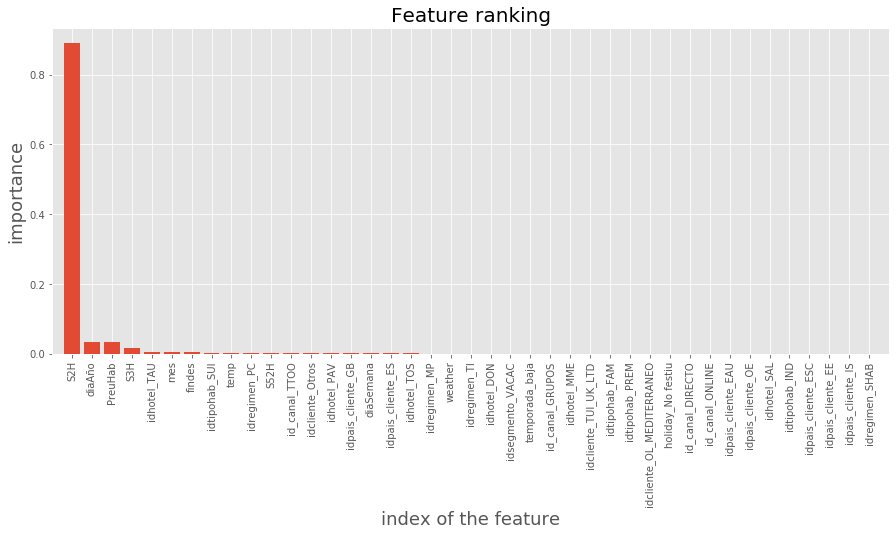

In [50]:
importances = DT.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,6))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(features_df.shape[1]), importances[indices],
    align="center")
plt.xticks(range(features_df.shape[1]), featImp.Features, rotation = 90)
plt.xlim([-1, features_df.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)


### Feature importance (Random forest)

In [51]:
# fit an Extra Trees model to the data
RF = RandomForestRegressor()
RF.fit(features_df, target)
# display the relative importance of each attribute
# print(model.feature_importances_)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
featImp = pd.DataFrame({'Features': features_df.columns.tolist(), 'Importance': RF.feature_importances_.tolist()})
featImp = featImp.sort_values(by = ['Importance'], ascending = False)
featImp

,Features,Importance
0,S2H,8.887132e-01
4,diaAño,4.017381e-02
1,S3H,1.872653e-02
3,PreuHab,1.567495e-02
7,mes,5.111434e-03
39,temporada_baja,3.951426e-03
14,idhotel_TAU,3.757429e-03
6,temp,3.292567e-03
8,diaSemana,2.574749e-03
38,idpais_cliente_OE,2.429899e-03


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Feature ranking')

<BarContainer object of 41 artists>

([<matplotlib.axis.XTick at 0x1f15b21c550>,
 <a list of 41 Text xticklabel objects>)

(-1, 41)

Text(0, 0.5, 'importance')

Text(0.5, 0, 'index of the feature')

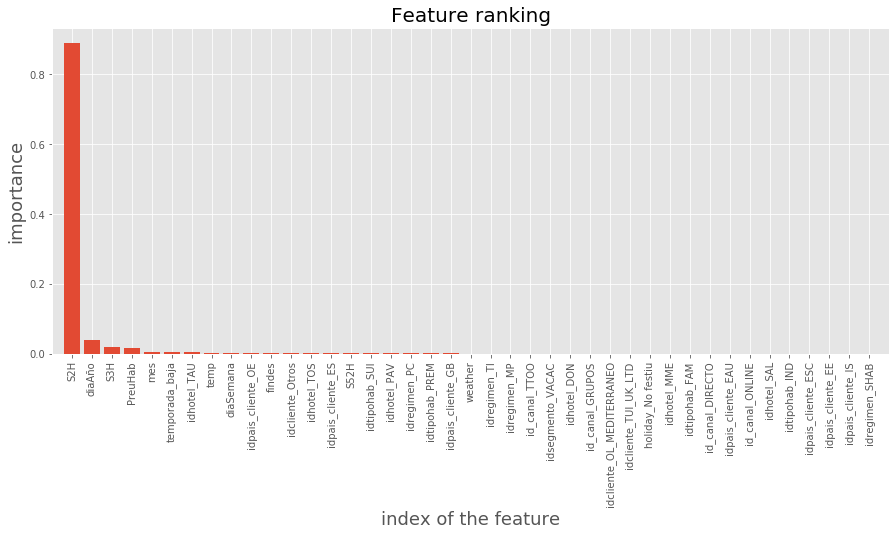

In [53]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]
#print("Feature ranking:")

plt.figure(figsize = (15,6))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(features_df.shape[1]), importances[indices],
    align="center")
plt.xticks(range(features_df.shape[1]), featImp.Features, rotation = 90)
plt.xlim([-1, features_df.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

### Feature importance (XGBoost) 

In [54]:
GB = XGBRegressor()
GB.fit(features_df, target)

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
featImp = pd.DataFrame({'Features': features_df.columns.tolist(), 'Importance': GB.feature_importances_.tolist()})
featImp = featImp.sort_values(by = ['Importance'], ascending = False)
featImp

,Features,Importance
0,S2H,0.602912
24,idregimen_PC,0.061725
4,diaAño,0.060530
3,PreuHab,0.058888
7,mes,0.051942
1,S3H,0.046805
21,idtipohab_PREM,0.017318
34,idpais_cliente_ES,0.017223
12,idhotel_PAV,0.012850
18,idcliente_TUI_UK_LTD,0.011318


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Feature ranking')

<BarContainer object of 41 artists>

([<matplotlib.axis.XTick at 0x1f15ac73ba8>,
 <a list of 41 Text xticklabel objects>)

(-1, 41)

Text(0, 0.5, 'importance')

Text(0.5, 0, 'index of the feature')

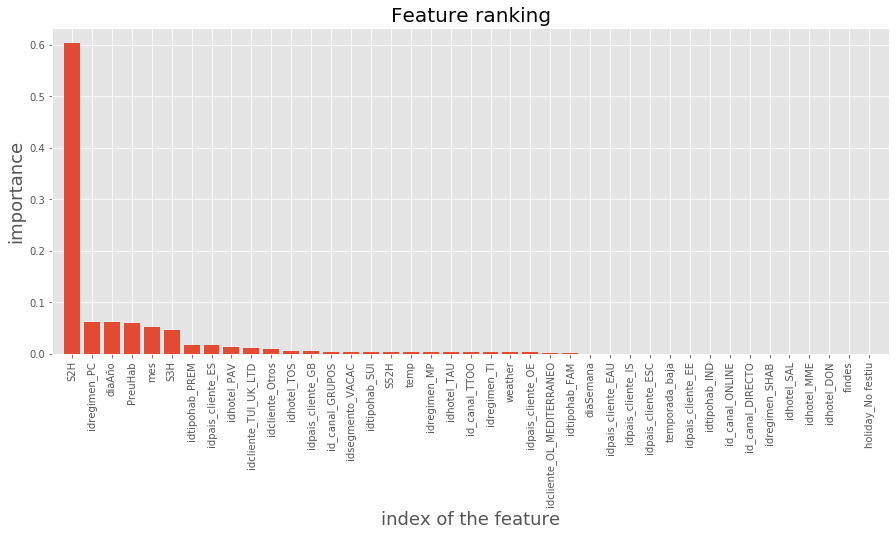

In [56]:
importances = GB.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,6))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(features_df.shape[1]), importances[indices],
    align="center")
plt.xticks(range(features_df.shape[1]), featImp.Features, rotation = 90)
plt.xlim([-1, features_df.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [57]:
df1 = df1.join(df_fecha)

In [58]:
df1.to_csv(mainpath + 'dfModel.csv', header = True, index = None)